In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from functools import reduce
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split


# settings
# pandas.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Introduction to Dataset

In [6]:
introduction_features = pd.read_csv('https://drive.google.com/uc?id=1H28hcW41LGIzK6l_8b0QFiphUBzWqlIi')
introduction_features.set_index(['No.'])

Name    Type   \
No.                               
5                proto  nominal   
6                state  nominal   
7                  dur    Float   
8               sbytes  Integer   
9               dbytes  Integer   
10                sttl  Integer   
11                dttl  Integer   
12               sloss  Integer   
13               dloss  Integer   
14             service  nominal   
15               sload    Float   
16               dload    Float   
17               spkts  integer   
18               dpkts  integer   
19                swin  integer   
20                dwin  integer   
21               stcpb  integer   
22               dtcpb  integer   
23               smean  integer   
24               dmean  integer   
25         trans_depth  integer   
26   response_body_len  integer   
27                sjit    Float   
28                djit    Float   
31              sinpkt    Float   
32              dinpkt    Float   
33              tcprtt    Float   
34              synack    Float   
35              ackdat    Float   
36     is_sm_ips_ports   Binary   
37        ct_state_ttl  Integer   
38    ct_flw_http_mthd  Integer   
39        is_ftp_login   Binary   
40          ct_ftp_cmd  integer   
41          ct_srv_src  integer   
42          ct_srv_dst  integer   
43          ct_dst_ltm  integer   
44          ct_src_ltm  integer   
45    ct_src_dport_ltm  integer   
46    ct_dst_sport_ltm  integer   
47      ct_dst_src_ltm  integer   
48          attack_cat  nominal   
49               label   binary   

                                           Description feature_type  
No.                                                                  
5                                 Transaction protocol         flow  
6    Indicates to the state and its dependent proto...        basic  
7                                Record total duration        basic  
8             Source to destination transaction bytes         basic  
9              Destination to source transaction bytes        basic  
10           Source to destination time to live value         basic  
11            Destination to source time to live value        basic  
12            Source packets retransmitted or dropped         basic  
13        Destination packets retransmitted or dropped        basic  
14   http, ftp, smtp, ssh, dns, ftp-data ,irc  and ...        basic  
15                              Source bits per second        basic  
16                         Destination bits per second        basic  
17                 Source to destination packet count         basic  
18                  Destination to source packet count        basic  
19               Source TCP window advertisement value      content  
20          Destination TCP window advertisement value      content  
21                     Source TCP base sequence number      content  
22                Destination TCP base sequence number      content  
23   Mean of the ?ow packet size transmitted by the...      content  
24   Mean of the ?ow packet size transmitted by the...      content  
25   Represents the pipelined depth into the connec...      content  
26   Actual uncompressed content size of the data t...      content  
27                                Source jitter (mSec)         time  
28                           Destination jitter (mSec)         time  
31              Source interpacket arrival time (mSec)         time  
32         Destination interpacket arrival time (mSec)         time  
33   TCP connection setup round-trip time, the sum ...         time  
34   TCP connection setup time, the time between th...         time  
35   TCP connection setup time, the time between th...         time  
36   If source (1) and destination (3)IP addresses ...   additional  
37   No. for each state (6) according to specific r...   additional  
38   No. of flows that has methods such as Get and ...   additional  
39   If the ftp session is accessed by user and pas...   addit

# Combine Data

In [7]:
print("foo")
cd_basic_feature = pd.read_csv('https://drive.google.com/uc?id=1ROkbh0LFIsix1kzyKUjrnWycoaOdL6WB')
cd_additional_feature = pd.read_csv('https://drive.google.com/uc?id=1ELYJRl0SuMR3Y0NJFl369FdEejfcOudS')
cd_content_feature = pd.read_csv('https://drive.google.com/uc?id=1n0j28tTsYa59iutrR6ID3zYLBQSbsXuC')
cd_flow_feature = pd.read_csv('https://drive.google.com/uc?id=1NiuQZ_xAkrYuwqGCBiNEMe3tWFsSJBza')
cd_label = pd.read_csv('https://drive.google.com/uc?id=1oIL5pBDX31KPh10IeW4ahzppPSJq907R')
cd_time_feature = pd.read_csv('https://drive.google.com/uc?id=1IehRRoVKyoSiuz1XUpYY_E_LMScWIZ-S')
cd_fd_all_list = [cd_basic_feature, cd_additional_feature, cd_content_feature, cd_flow_feature, cd_label, cd_time_feature]
cd_main_df = reduce(lambda  left,right: pd.merge(left,right,on=['id'],
                                            how='inner'), cd_fd_all_list)
cd_main_df

foo


state       dur   sbytes    dbytes   sttl   dttl  sloss  dloss service  \
0        FIN  2.736664  13350.0  548216.0   31.0   29.0   21.0  197.0       -   
1        INT  0.000009    114.0       0.0  254.0    0.0    0.0    0.0     dns   
2        FIN  5.788526   6102.0    3892.0  254.0  252.0   13.0   13.0       -   
3        FIN  3.849634  25160.0       NaN   31.0   29.0   38.0  390.0       -   
4        CON  0.001052    130.0     162.0    NaN   29.0    0.0    0.0     dns   
...      ...       ...      ...       ...    ...    ...    ...    ...     ...   
175336   INT  0.000005    114.0       0.0  254.0    0.0    0.0    0.0     dns   
175337   FIN  4.449357   1272.0    1634.0   62.0    NaN    7.0    NaN     ftp   
175338   INT  0.000008    114.0       0.0  254.0    0.0    0.0    0.0     dns   
175339   INT  0.000004    114.0       0.0  254.0    0.0    0.0    0.0     dns   
175340   INT  0.000009    114.0       0.0  254.0    0.0    0.0    0.0     dns   

               sload         dload  spkts  dpkts      id  is_sm_ips_ports  \
0       3.885899e+04  1.598925e+06  232.0  438.0       0              0.0   
1       5.066666e+07  0.000000e+00    2.0    0.0       1              0.0   
2       8.199669e+03  5.221364e+03   36.0   34.0       2              0.0   
3       5.216912e+04  2.272451e+06  448.0  858.0       3              0.0   
4       4.942966e+05  6.159696e+05    2.0    2.0       4              0.0   
...              ...           ...    ...    ...     ...              ...   
175336  9.120000e+07  0.000000e+00    2.0    0.0  175336              0.0   
175337  2.191777e+03  2.804900e+03   24.0   22.0  175337              0.0   
175338  5.700000e+07  0.000000e+00    NaN    0.0  175338              0.0   
175339  1.140000e+08  0.000000e+00    2.0    0.0  175339              0.0   
175340  5.066666e+07  0.000000e+00    2.0    0.0  175340              0.0   

        ct_state_ttl  ct_flw_http_mthd  is_ftp_login  ct_ftp_cmd  ct_srv_src  \
0                0.0               0.0           0.0         0.0        11.0   
1                2.0               0.0           0.0         0.0        10.0   
2                NaN               0.0           0.0         0.0         4.0   
3                0.0               0.0           0.0         0.0         9.0   
4                0.0               0.0           0.0         0.0         3.0   
...              ...               ...           ...         ...         ...   
175336           2.0               0.0           0.0         0.0        38.0   
175337           1.0               0.0           1.0         1.0         1.0   
175338           2.0               0.0           NaN         0.0        33.0   
175339           2.0               0.0           0.0         0.0        36.0   
175340           2.0               0.0           0.0         0.0        24.0   

        ct_srv_dst  ct_dst_ltm  ct_src_ltm  ct_src_dport_ltm  \
0              NaN         5.0         4.0               2.0   
1             10.0        10.0        10.0               NaN   
2              4.0         2.0         2.0               1.0   
3              9.0         3.0         2.0               2.0   
4              3.0         4.0         3.0               1.0   
...            ...         ...         ...               ...   
175336        38.0        32.0         NaN              32.0   
175337         1.0         2.0         3.0               NaN   
175338        33.0        16.0        16.0              16.0   
175339        36.0         NaN        37.0              36.0   
175340        24.0        16.0        16.0              16.0   

        ct_dst_sport_ltm  ct_dst_src_ltm   swin   dwin         stcpb  \
0                    1.0             5.0  255.0  255.0  4.864839e+08   
1                   10.0            10.0    0.0    0.0  0.000000e+00   
2                    1.0             4.0  255.0  255.0  3.835852e+09   
3                    1.0             6.0  255.0  255.0           NaN   
4                  

# EDA - Initial Overview

## 1. Initial Statistic

In [8]:
# basic statistic
eda_main_df = cd_main_df.copy()
cd_main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   state              166536 non-null  object 
 1   dur                166619 non-null  float64
 2   sbytes             166780 non-null  float64
 3   dbytes             166472 non-null  float64
 4   sttl               166516 non-null  float64
 5   dttl               166687 non-null  float64
 6   sloss              166547 non-null  float64
 7   dloss              166363 non-null  float64
 8   service            166550 non-null  object 
 9   sload              166555 non-null  float64
 10  dload              166504 non-null  float64
 11  spkts              166687 non-null  float64
 12  dpkts              166655 non-null  float64
 13  id                 175341 non-null  int64  
 14  is_sm_ips_ports    166595 non-null  float64
 15  ct_state_ttl       166706 non-null  float64
 16  ct

In [9]:
eda_desc_df = eda_main_df.describe(include="all")
eda_desc_df = eda_desc_df.T
eda_desc_df['unique'] = eda_desc_df['unique'].fillna(cd_main_df.nunique())
eda_desc_df['count'] = eda_desc_df['count'].astype('int32')
eda_desc_df['missing'] = cd_main_df.shape[0] - eda_desc_df['count']
eda_desc_df

<ipython-input-9-ac84856fa66b>:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  eda_desc_df['unique'] = eda_desc_df['unique'].fillna(cd_main_df.nunique())


count  unique     top   freq              mean  \
state              166536       9     INT  78148               NaN   
dur                166619   70713     NaN    NaN          1.359299   
sbytes             166780    6997     NaN    NaN       8734.078601   
dbytes             166472    6432     NaN    NaN      14935.893844   
sttl               166516      11     NaN    NaN        179.521944   
dttl               166687       6     NaN    NaN         79.584179   
sloss              166547     394     NaN    NaN           4.90479   
dloss              166363     365     NaN    NaN          6.971688   
service            166550      13       -  89434               NaN   
sload              166555   77315     NaN    NaN   73421861.280645   
dload              166504   73756     NaN    NaN     671859.593293   
spkts              166687     470     NaN    NaN         20.266134   
dpkts              166655     432     NaN    NaN         18.923015   
id                 175341  175341     NaN    NaN           87670.0   
is_sm_ips_ports    166595       2     NaN    NaN          0.015799   
ct_state_ttl       166706       5     NaN    NaN          1.303852   
ct_flw_http_mthd   166694      11     NaN    NaN          0.132722   
is_ftp_login       166694       4     NaN    NaN          0.014974   
ct_ftp_cmd         166499       4     NaN    NaN          0.014961   
ct_srv_src         166490      52     NaN    NaN          9.304415   
ct_srv_dst         166567      52     NaN    NaN          9.104384   
ct_dst_ltm         166603      50     NaN    NaN          6.191773   
ct_src_ltm         166518      50     NaN    NaN           6.95245   
ct_src_dport_ltm   166566      47     NaN    NaN          5.388116   
ct_dst_sport_ltm   166553      32     NaN    NaN          4.198363   
ct_dst_src_ltm     166446      54     NaN    NaN             8.731   
swin               166601      11     NaN    NaN        116.184837   
dwin               166562       7     NaN    NaN        114.956407   
stcpb              166669   71744     NaN    NaN  969620990.245607   
dtcpb              166538   71536     NaN    NaN  969347904.206169   
smean              166553    1356     NaN    NaN         136.80384   
dmean              166486    1322     NaN    NaN        124.161041   
trans_depth        166556      11     NaN    NaN          0.106193   
response_body_len  166550    2327     NaN    NaN       2157.132771   
proto              166515     133     tcp  75902               NaN   
attack_cat         175341      10  Normal  56000               NaN   
label              175341       2     NaN    NaN          0.680622   
sjit               166603   73895     NaN    NaN       4993.981892   
djit               166495   73045     NaN    NaN         604.89172   
sinpkt             166634   72757     NaN    NaN        987.360974   
dinpkt             166607   70746     NaN    NaN         87.763617   
tcprtt             166505   41517     NaN    NaN          0.041331   
synack             166605   38626     NaN    NaN          0.021042   
ackdat             166746   36365     NaN    NaN          0.020402   

                                 std   min           25%          50%  \
state                            NaN   NaN           NaN          NaN   
dur                         6.485386   0.0      0.000008     0.001548   
sbytes                 171228.850727  28.0         114.0        450.0   
dbytes                 143015.039555   0.0           0.0        164.0   
sttl                      102.957427   0.0          62.0        254.0   
dttl                      110.494848   0.0           0.0         29.0   
sloss                      64.867849   0.0           0.0          0.0   
dloss                      51.801936   0.0           0.0          0.0   
service                          NaN   NaN           NaN          NaN   
sload               188456446.952319   0.0  13030.319335  871454.4375   
dload                  2422878.53219   0.0           0.0    1426.6

In [10]:
# further exploration on columns that have small number of unique data.

eda_desc_temp = eda_desc_df[eda_desc_df['unique'] < 100]
eda_desc_temp

count  unique     top   freq        mean         std  min  \
state             166536       9     INT  78148         NaN         NaN  NaN   
sttl              166516      11     NaN    NaN  179.521944  102.957427  0.0   
dttl              166687       6     NaN    NaN   79.584179  110.494848  0.0   
service           166550      13       -  89434         NaN         NaN  NaN   
is_sm_ips_ports   166595       2     NaN    NaN    0.015799    0.124697  0.0   
ct_state_ttl      166706       5     NaN    NaN    1.303852    0.954779  0.0   
ct_flw_http_mthd  166694      11     NaN    NaN    0.132722    0.692019  0.0   
is_ftp_login      166694       4     NaN    NaN    0.014974    0.126338  0.0   
ct_ftp_cmd        166499       4     NaN    NaN    0.014961    0.125771  0.0   
ct_srv_src        166490      52     NaN    NaN    9.304415   10.699782  1.0   
ct_srv_dst        166567      52     NaN    NaN    9.104384   10.758098  1.0   
ct_dst_ltm        166603      50     NaN    NaN    6.191773    8.050067  1.0   
ct_src_ltm        166518      50     NaN    NaN     6.95245    8.318103  1.0   
ct_src_dport_ltm  166566      47     NaN    NaN    5.388116    8.044942  1.0   
ct_dst_sport_ltm  166553      32     NaN    NaN    4.198363    5.775348  1.0   
ct_dst_src_ltm    166446      54     NaN    NaN       8.731   10.956486  1.0   
swin              166601      11     NaN    NaN  116.184837  126.994753  0.0   
dwin              166562       7     NaN    NaN  114.956407  126.880855  0.0   
trans_depth       166556      11     NaN    NaN    0.106193     0.79407  0.0   
attack_cat        175341      10  Normal  56000         NaN         NaN  NaN   
label             175341       2     NaN    NaN    0.680622    0.466237  0.0   

                   25%    50%    75%    max  missing  
state              NaN    NaN    NaN    NaN     8805  
sttl              62.0  254.0  254.0  255.0     8825  
dttl               0.0   29.0  252.0  254.0     8654  
service            NaN    NaN    NaN    NaN     8791  
is_sm_ips_ports    0.0    0.0    0.0    1.0     8746  
ct_state_ttl       1.0    1.0    2.0    6.0     8635  
ct_flw_http_mthd   0.0    0.0    0.0   30.0     8647  
is_ftp_login       0.0    0.0    0.0    4.0     8647  
ct_ftp_cmd         0.0    0.0    0.0    4.0     8842  
ct_srv_src         2.0    5.0   12.0   63.0     8851  
ct_srv_dst         2.0    4.0   12.0   62.0     8774  
ct_dst_ltm         1.0    2.0    7.0   51.0     8738  
ct_src_ltm         2.0    3.0    9.0   60.0     8823  
ct_src_dport_ltm   1.0    1.0    5.0   51.0     8775  
ct_dst_sport_ltm   1.0    1.0    3.0   46.0     8788  
ct_dst_src_ltm     1.0    3.0   12.0   65.0     8895  
swin               0.0    0.0  255.0  255.0     8740  
dwin               0.0    0.0  255.0  255.0     8779  
trans_depth        0.0    0.0    0.0  172.0     8785  
attack_cat         NaN    NaN    NaN    NaN        0  
label              0.0    1.0    1.0    1.0        0

Based on the number of Unique data in a column,
We can make some become categorical data

In [11]:
# Separate Column Name
eda_numerical_col = eda_main_df.select_dtypes(include=['number']).columns.tolist()
eda_numerical_col.remove('label')

eda_categorical_col = eda_main_df.select_dtypes(exclude=['number']).columns.tolist()
eda_categorical_col += ['label']

print(eda_numerical_col)
print(eda_categorical_col)
print("total:", len(eda_categorical_col) + len(eda_numerical_col))


['dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'sload', 'dload', 'spkts', 'dpkts', 'id', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'sjit', 'djit', 'sinpkt', 'dinpkt', 'tcprtt', 'synack', 'ackdat']
['state', 'service', 'proto', 'attack_cat', 'label']
total: 44


In [12]:
for column in eda_main_df.columns:
    try:
        unique_values = eda_main_df[column].sort_values().unique()
        print(f"Column: {column}")
        print(f"Unique Values: {unique_values}")
        print(f"Total Unique Values: {len(unique_values)}\n")
    except:
        print(f"{column}: error\n")
        # unique_values = sorted(eda_main_df[column].unique(), key=lambda x: str(x))
        # print(f"Column: {column}")
        # print(f"Unique Values: {unique_values}")
        # print(f"Total Unique Values: {len(unique_values)}\n")

Column: state
Unique Values: ['CON' 'ECO' 'FIN' 'INT' 'PAR' 'REQ' 'RST' 'URN' 'no' nan]
Total Unique Values: 10

Column: dur
Unique Values: [0.0000000e+00 1.0000000e-06 2.0000000e-06 ... 5.9999985e+01 5.9999989e+01
           nan]
Total Unique Values: 70714

Column: sbytes
Unique Values: [2.8000000e+01 4.6000000e+01 5.6000000e+01 ... 1.2594395e+07 1.2965233e+07
           nan]
Total Unique Values: 6998

Column: dbytes
Unique Values: [0.0000000e+00 2.8000000e+01 5.6000000e+01 ... 1.4491793e+07 1.4655550e+07
           nan]
Total Unique Values: 6433

Column: sttl
Unique Values: [  0.   1.  29.  31.  60.  62.  63.  64. 252. 254. 255.  nan]
Total Unique Values: 12

Column: dttl
Unique Values: [  0.  29.  31.  60. 252. 254.  nan]
Total Unique Values: 7

Column: sloss
Unique Values: [0.000e+00 1.000e+00 2.000e+00 3.000e+00 4.000e+00 5.000e+00 6.000e+00
 7.000e+00 8.000e+00 9.000e+00 1.000e+01 1.100e+01 1.200e+01 1.300e+01
 1.400e+01 1.500e+01 1.600e+01 1.700e+01 1.800e+01 1.900e+01 2.000e+01

### 2. Visualization

In [13]:
eda_main_df
pairplot = sns.pairplot(eda_main_df[eda_numerical_col].sample(frac=.01),corner=True)
# pairplot.fig.savefig('pairplot.png', dpi=300, bbox_inches='tight')

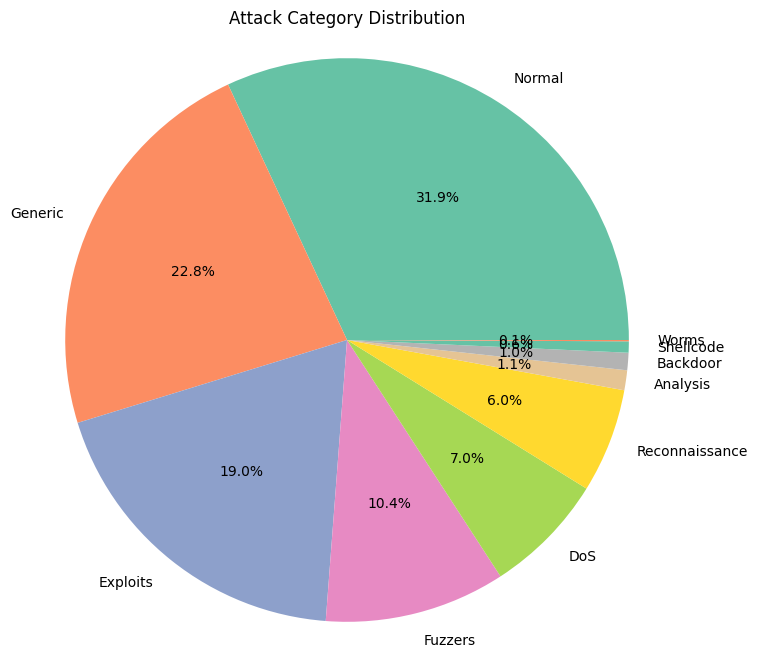

In [14]:
plt.figure(figsize=(8, 8))
attack_counts = eda_main_df['attack_cat'].value_counts()
plt.pie(attack_counts, labels=attack_counts.index, autopct='%1.1f%%',
        colors=sns.color_palette('Set2', len(attack_counts)))
plt.title('Attack Category Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

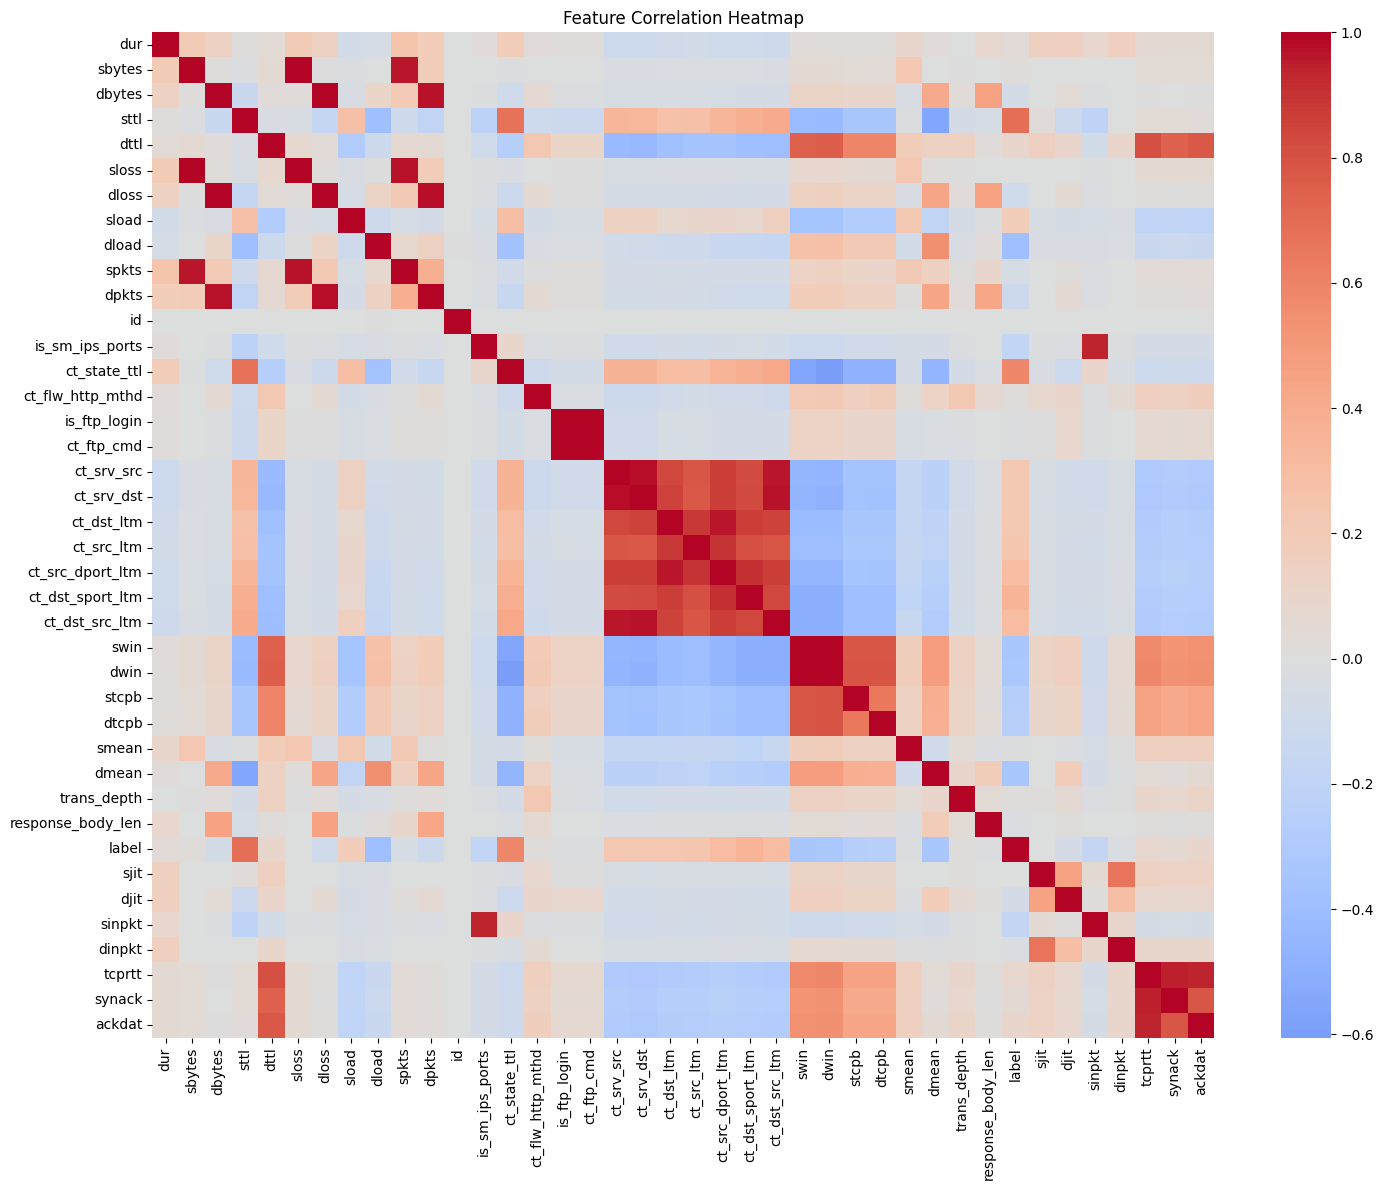

In [15]:
# Heat map correlation
numeric_col = eda_main_df.select_dtypes(include=['float', 'int'])

plt.figure(figsize=(15, 12))
sns.heatmap(numeric_col.corr(), annot=False, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

<Figure size 2000x2000 with 0 Axes>

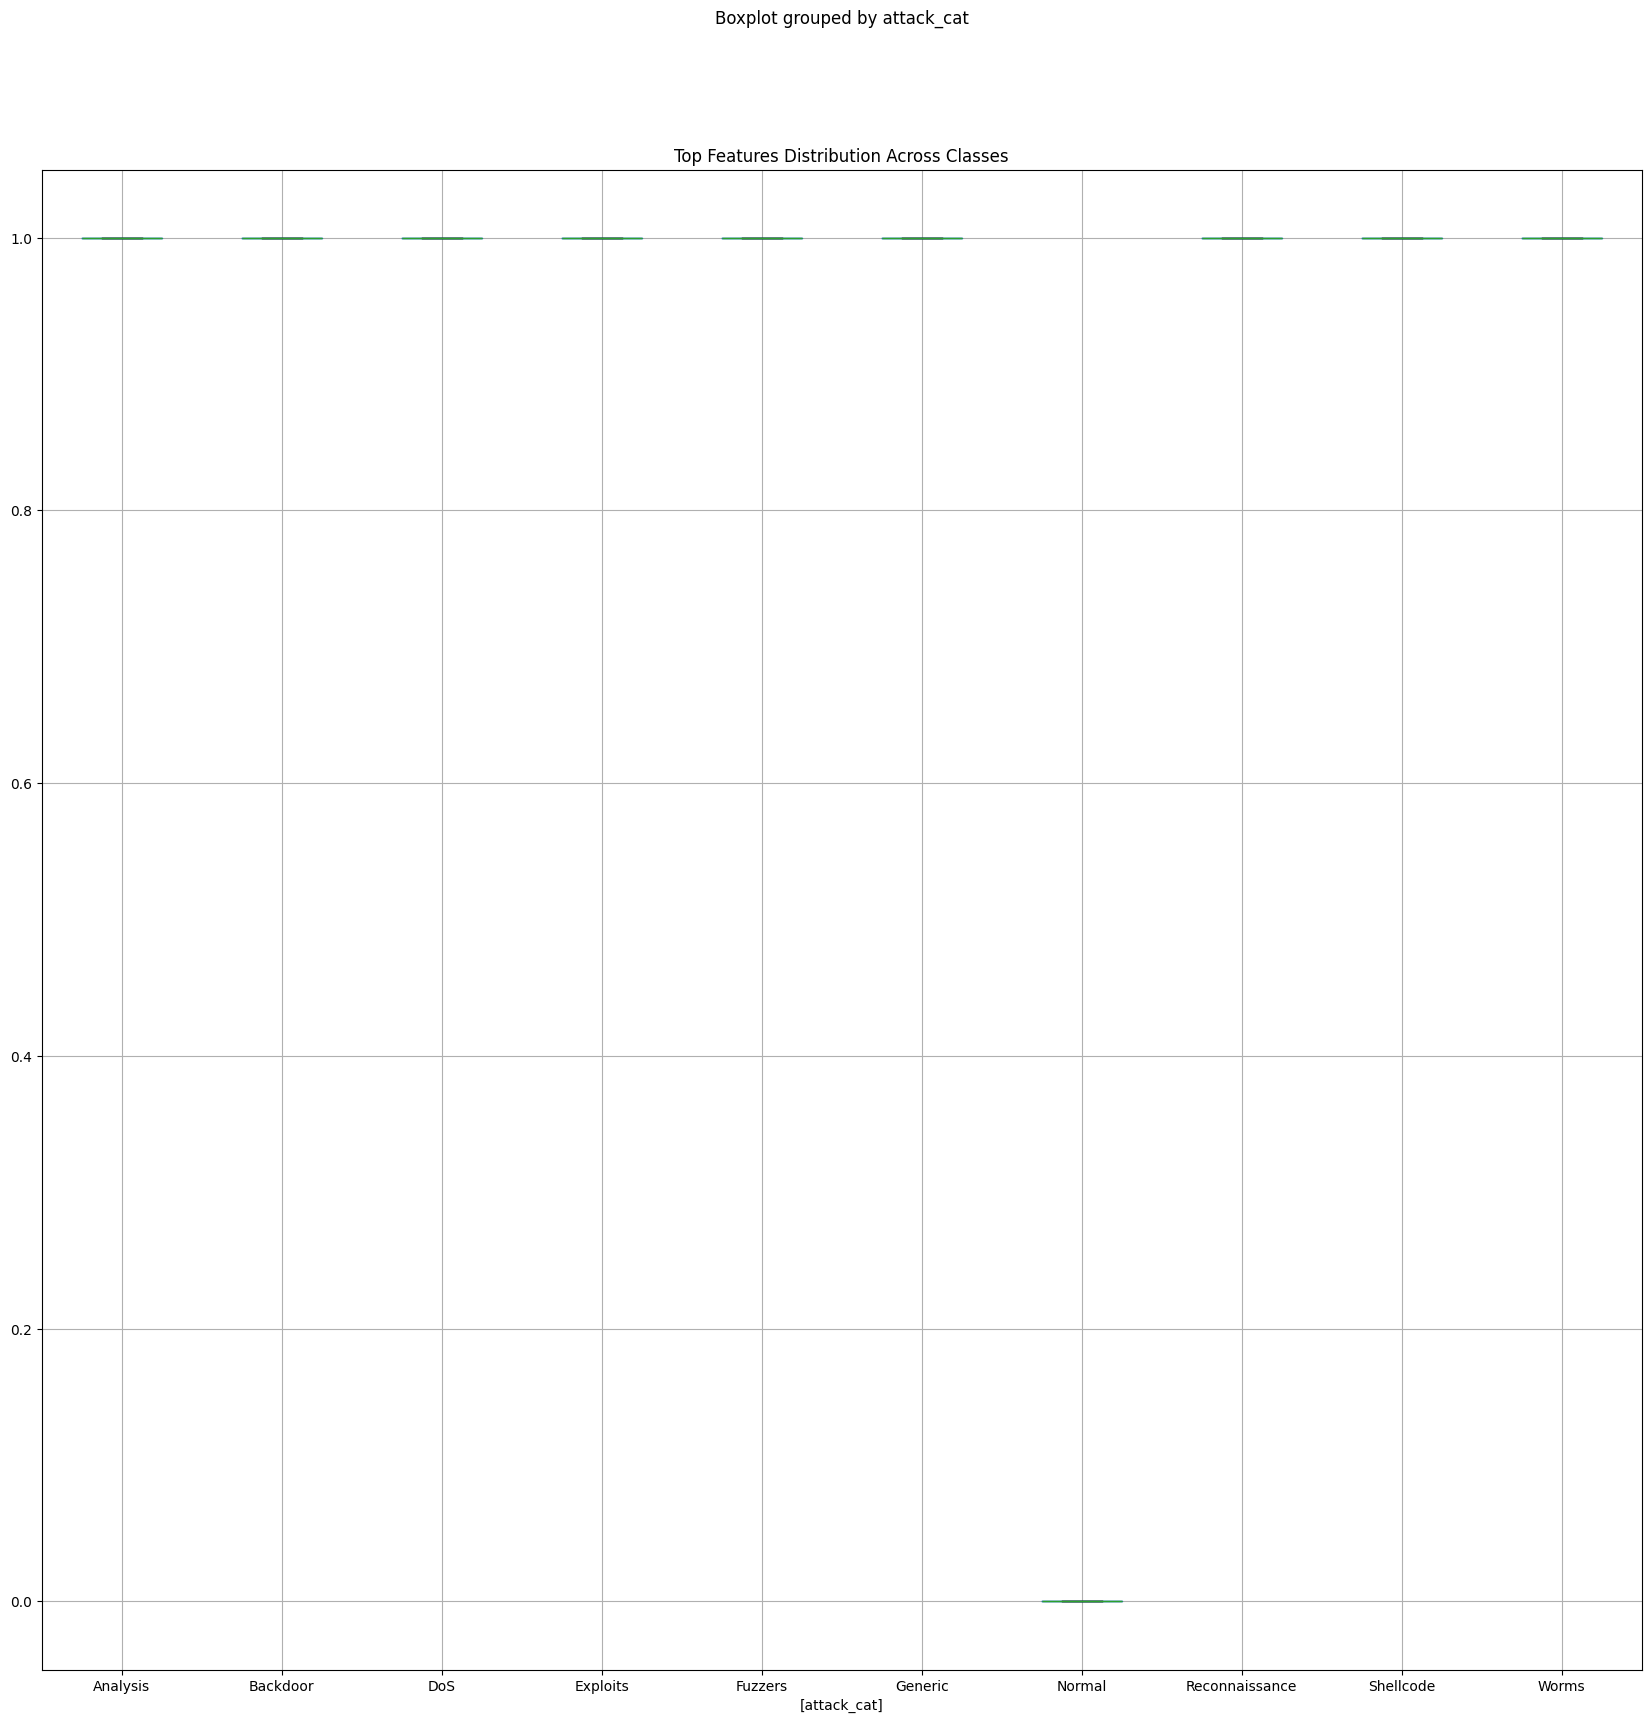

In [16]:
plt.figure(figsize=(20, 20))
# top_features = eda_main_df.corrwith(pd.get_dummies(y)).abs().nlargest(10).index
eda_main_df[eda_categorical_col].boxplot(by='attack_cat', figsize=(20, 20))
plt.title('Top Features Distribution Across Classes')
plt.show()

### 3. Check Duplicates

In [17]:
# Check how many duplicated data
print("Duplicates in train_df: ",eda_main_df.duplicated().sum())

Duplicates in train_df:  0


### 4. Check Nan Value

In [18]:
eda_missing_data = eda_main_df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
eda_missing_data["% of Missing Values"] = round((eda_missing_data["Total No. of Missing Values"]/len(eda_main_df))*100,2)
eda_missing_data

Total No. of Missing Values  % of Missing Values
state                                     8805                 5.02
dur                                       8722                 4.97
sbytes                                    8561                 4.88
dbytes                                    8869                 5.06
sttl                                      8825                 5.03
dttl                                      8654                 4.94
sloss                                     8794                 5.02
dloss                                     8978                 5.12
service                                   8791                 5.01
sload                                     8786                 5.01
dload                                     8837                 5.04
spkts                                     8654                 4.94
dpkts                                     8686                 4.95
id                                           0                 0.00
is_sm_ips_ports                           8746                 4.99
ct_state_ttl                              8635                 4.92
ct_flw_http_mthd                          8647                 4.93
is_ftp_login                              8647                 4.93
ct_ftp_cmd                                8842                 5.04
ct_srv_src                                8851                 5.05
ct_srv_dst                                8774                 5.00
ct_dst_ltm                                8738                 4.98
ct_src_ltm                                8823                 5.03
ct_src_dport_ltm                          8775                 5.00
ct_dst_sport_ltm                          8788                 5.01
ct_dst_src_ltm                            8895                 5.07
swin                                      8740                 4.98
dwin                                      8779                 5.01
stcpb                                     8672                 4.95
dtcpb                                     8803                 5.02
smean                                     8788                 5.01
dmean                                     8855                 5.05
trans_depth                               8785                 5.01
response_body_len                         8791                 5.01
proto                                     8826                 5.03
attack_cat                                   0                 0.00
label                                        0                 0.00
sjit                                      8738                 4.98
djit                                      8846                 5.05
sinpkt                                    8707                 4.97
dinpkt                                    8734                 4.98
tcprtt                                    8836                 5.04
synack                                    8736                 4.98
ackdat                                    8595                 4.90

In [19]:
eda_missing_data

Total No. of Missing Values  % of Missing Values
state                                     8805                 5.02
dur                                       8722                 4.97
sbytes                                    8561                 4.88
dbytes                                    8869                 5.06
sttl                                      8825                 5.03
dttl                                      8654                 4.94
sloss                                     8794                 5.02
dloss                                     8978                 5.12
service                                   8791                 5.01
sload                                     8786                 5.01
dload                                     8837                 5.04
spkts                                     8654                 4.94
dpkts                                     8686                 4.95
id                                           0                 0.00
is_sm_ips_ports                           8746                 4.99
ct_state_ttl                              8635                 4.92
ct_flw_http_mthd                          8647                 4.93
is_ftp_login                              8647                 4.93
ct_ftp_cmd                                8842                 5.04
ct_srv_src                                8851                 5.05
ct_srv_dst                                8774                 5.00
ct_dst_ltm                                8738                 4.98
ct_src_ltm                                8823                 5.03
ct_src_dport_ltm                          8775                 5.00
ct_dst_sport_ltm                          8788                 5.01
ct_dst_src_ltm                            8895                 5.07
swin                                      8740                 4.98
dwin                                      8779                 5.01
stcpb                                     8672                 4.95
dtcpb                                     8803                 5.02
smean                                     8788                 5.01
dmean                                     8855                 5.05
trans_depth                               8785                 5.01
response_body_len                         8791                 5.01
proto                                     8826                 5.03
attack_cat                                   0                 0.00
label                                        0                 0.00
sjit                                      8738                 4.98
djit                                      8846                 5.05
sinpkt                                    8707                 4.97
dinpkt                                    8734                 4.98
tcprtt                                    8836                 5.04
synack                                    8736                 4.98
ackdat                                    8595                 4.90

# EDA - Data Cleansing and Preprocess

## 1. Clean Every Col

In [48]:
clean_df = cd_main_df.copy()
print(f"jumlah missing value 1: {clean_df.isnull().sum().sum()}")

# 1. Isi nilai NaN pada col is_sm_ips_ports, is_ftp_login, dan ct_flw_http_mthd dengan 0
clean_df['is_sm_ips_ports'] = clean_df['is_sm_ips_ports'].fillna(0)
clean_df['is_ftp_login'] = clean_df['is_ftp_login'].fillna(0)
clean_df['ct_flw_http_mthd'] = clean_df['ct_flw_http_mthd'].fillna(0)
print(f"jumlah missing value 2: {clean_df.isnull().sum().sum()}")

# 2. Mengisi nilai NaN pada col tcprtt dengan penjumlahan synack dan ackdat
condition = (clean_df['tcprtt'].isnull()) & (clean_df['synack'].notnull()) & (clean_df['ackdat'].notnull())
clean_df.loc[condition, 'tcprtt'] = clean_df.loc[condition, 'synack'] + clean_df.loc[condition, 'ackdat']
print(f"jumlah missing value 3: {clean_df.isnull().sum().sum()}")

# 3. Mengisi nilai NaN pada col smean dengan pembagian sbytes oleh spkts
condition = (clean_df['smean'].isnull()) & (clean_df['sbytes'].notnull()) & (clean_df['spkts'].notnull())
clean_df.loc[condition, 'smean'] = clean_df.loc[condition, 'sbytes'] / clean_df.loc[condition, 'spkts']
print(f"jumlah missing value 4: {clean_df.isnull().sum().sum()}")

# 4. Mengisi nilai NaN pada col dmean dengan pembagian dbytes oleh dpkts
condition = (clean_df['dmean'].isnull()) & (clean_df['dbytes'].notnull()) & (clean_df['dpkts'].notnull())
clean_df.loc[condition, 'dmean'] = clean_df.loc[condition, 'dbytes'] / clean_df.loc[condition, 'dpkts']
print(f"jumlah missing value 5: {clean_df.isnull().sum().sum()}")
print(clean_df.shape)

jumlah missing value 1: 359354
jumlah missing value 2: 333314
jumlah missing value 3: 325291
jumlah missing value 4: 317307
jumlah missing value 5: 313172
(175341, 44)


## Handling Outliers

In [49]:
numeric_attributes = clean_df.select_dtypes(include=['number']).columns.tolist()
for att in numeric_attributes :
  Q1 = clean_df[att].quantile(0.25)
  Q3 = clean_df[att].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = ((clean_df[att] < lower_bound) | (clean_df[att] > upper_bound)).sum()
  print(f"Jumlah outlier pada atribut {att}\t:{outliers}")

Jumlah outlier pada atribut dur	:14968
Jumlah outlier pada atribut sbytes	:21760
Jumlah outlier pada atribut dbytes	:26698
Jumlah outlier pada atribut sttl	:0
Jumlah outlier pada atribut dttl	:0
Jumlah outlier pada atribut sloss	:10879
Jumlah outlier pada atribut dloss	:26996
Jumlah outlier pada atribut sload	:12843
Jumlah outlier pada atribut dload	:36132
Jumlah outlier pada atribut spkts	:23470
Jumlah outlier pada atribut dpkts	:19752
Jumlah outlier pada atribut id	:0
Jumlah outlier pada atribut is_sm_ips_ports	:2632
Jumlah outlier pada atribut ct_state_ttl	:1838
Jumlah outlier pada atribut ct_flw_http_mthd	:16996
Jumlah outlier pada atribut is_ftp_login	:2443
Jumlah outlier pada atribut ct_ftp_cmd	:2443
Jumlah outlier pada atribut ct_srv_src	:18379
Jumlah outlier pada atribut ct_srv_dst	:18380
Jumlah outlier pada atribut ct_dst_ltm	:21021
Jumlah outlier pada atribut ct_src_ltm	:12487
Jumlah outlier pada atribut ct_src_dport_ltm	:31801
Jumlah outlier pada atribut ct_dst_sport_ltm	:35

## Feature Engineering

In [50]:
def generate_features(df):

    # Ratios
    df['byte_ratio'] = df['sbytes'] / (df['dbytes'] + 1)
    df['pkt_ratio'] = df['spkts'] / (df['dpkts'] + 1)
    df['load_ratio'] = df['sload'] / (df['dload'] + 1)
    df['jit_ratio'] = df['sjit'] / (df['djit'] + 1)
    df['inter_pkt_ratio'] = df['sinpkt'] / (df['dinpkt'] + 1)
    df['tcp_setup_ratio'] = df['tcprtt'] / (df['synack'] + df['ackdat'] + 1)

    # Aggregate Features
    df['total_bytes'] = df['sbytes'] + df['dbytes']
    df['total_pkts'] = df['spkts'] + df['dpkts']
    df['total_load'] = df['sload'] + df['dload']
    df['total_jitter'] = df['sjit'] + df['djit']
    df['total_inter_pkt'] = df['sinpkt'] + df['dinpkt']
    df['total_tcp_setup'] = df['tcprtt'] + df['synack'] + df['ackdat']

    # Interaction Features
    df['byte_pkt_interaction_src'] = df['sbytes'] * df['spkts']
    df['byte_pkt_interaction_dst'] = df['dbytes'] * df['dpkts']
    df['load_jit_interaction_src'] = df['sload'] * df['sjit']
    df['load_jit_interaction_dst'] = df['dload'] * df['djit']
    df['pkt_jit_interaction_src'] = df['spkts'] * df['sjit']
    df['pkt_jit_interaction_dst'] = df['dpkts'] * df['djit']

    # Statistical Features
    df['mean_pkt_size'] = df['smean'] + df['dmean']
    df['tcp_seq_diff'] = df['stcpb'] - df['dtcpb']

    return df

clean_df = generate_features(clean_df)

columns_to_drop = ['proto','state', 'service']
clean_df.drop(columns=columns_to_drop, inplace=True)

# print(clean_df.shape)



# Calculate the correlation matrix
numeric_col = eda_main_df.select_dtypes(include=['float', 'int'])
correlation_matrix = numeric_col.corr()

# Create a mask to identify the features with a correlation coefficient greater than or equal to 0.75
high_correlation_mask = correlation_matrix >= 0.75

# Identify and list the highly correlated features
highly_correlated_features = []

for feature in high_correlation_mask.columns:
    correlated_with = high_correlation_mask.index[high_correlation_mask[feature]].tolist()
    for correlated_feature in correlated_with:
        if feature != correlated_feature and (correlated_feature, feature) not in highly_correlated_features:
            highly_correlated_features.append((feature, correlated_feature))

# Print the highly correlated features
print("Highly correlated features:")
for feature1, feature2 in highly_correlated_features:
    print(f"{feature1} and {feature2}")

# Create a set of features to drop
features_to_drop = set()

# Iterate over the highly correlated features and add one of each pair to the drop list
for feature1, feature2 in highly_correlated_features:
    if feature1 not in features_to_drop and feature2 not in features_to_drop:
        features_to_drop.add(feature2)  # You can choose feature1 or feature2 to drop

print(features_to_drop)
# Drop the features from the DataFrame
final_main_df = clean_df.drop(columns=features_to_drop)

final_main_df.columns

Highly correlated features:
sbytes and sloss
sbytes and spkts
dbytes and dloss
dbytes and dpkts
dttl and dwin
dttl and tcprtt
dttl and ackdat
sloss and spkts
dloss and dpkts
is_sm_ips_ports and sinpkt
is_ftp_login and ct_ftp_cmd
ct_srv_src and ct_srv_dst
ct_srv_src and ct_dst_ltm
ct_srv_src and ct_src_ltm
ct_srv_src and ct_src_dport_ltm
ct_srv_src and ct_dst_sport_ltm
ct_srv_src and ct_dst_src_ltm
ct_srv_dst and ct_dst_ltm
ct_srv_dst and ct_src_ltm
ct_srv_dst and ct_src_dport_ltm
ct_srv_dst and ct_dst_sport_ltm
ct_srv_dst and ct_dst_src_ltm
ct_dst_ltm and ct_src_ltm
ct_dst_ltm and ct_src_dport_ltm
ct_dst_ltm and ct_dst_sport_ltm
ct_dst_ltm and ct_dst_src_ltm
ct_src_ltm and ct_src_dport_ltm
ct_src_ltm and ct_dst_sport_ltm
ct_src_ltm and ct_dst_src_ltm
ct_src_dport_ltm and ct_dst_sport_ltm
ct_src_dport_ltm and ct_dst_src_ltm
ct_dst_sport_ltm and ct_dst_src_ltm
swin and dwin
swin and stcpb
swin and dtcpb
dwin and stcpb
dwin and dtcpb
tcprtt and synack
tcprtt and ackdat
synack and ackdat
{

Index(['dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sload', 'dload', 'id',
       'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login',
       'ct_srv_src', 'swin', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'attack_cat', 'label', 'sjit', 'djit', 'dinpkt',
       'synack', 'byte_ratio', 'pkt_ratio', 'load_ratio', 'jit_ratio',
       'inter_pkt_ratio', 'tcp_setup_ratio', 'total_bytes', 'total_pkts',
       'total_load', 'total_jitter', 'total_inter_pkt', 'total_tcp_setup',
       'byte_pkt_interaction_src', 'byte_pkt_interaction_dst',
       'load_jit_interaction_src', 'load_jit_interaction_dst',
       'pkt_jit_interaction_src', 'pkt_jit_interaction_dst', 'mean_pkt_size',
       'tcp_seq_diff'],
      dtype='object')

In [22]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoder = LabelEncoder()
ohe = OneHotEncoder()
final_main_df['attack_cat'] = label_encoder.fit_transform(final_main_df['attack_cat'])
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:")
print(label_mapping)

Label Mapping:
{'Analysis': 0, 'Backdoor': 1, 'DoS': 2, 'Exploits': 3, 'Fuzzers': 4, 'Generic': 5, 'Normal': 6, 'Reconnaissance': 7, 'Shellcode': 8, 'Worms': 9}


In [23]:
x = final_main_df.drop(['attack_cat'], axis=1)
y = final_main_df['attack_cat']
x = x.fillna(x.median())
x.columns

Index(['dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sload', 'dload', 'id',
       'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login',
       'ct_srv_src', 'swin', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'label', 'sjit', 'djit', 'dinpkt', 'synack',
       'byte_ratio', 'pkt_ratio', 'load_ratio', 'jit_ratio', 'inter_pkt_ratio',
       'tcp_setup_ratio', 'total_bytes', 'total_pkts', 'total_load',
       'total_jitter', 'total_inter_pkt', 'total_tcp_setup',
       'byte_pkt_interaction_src', 'byte_pkt_interaction_dst',
       'load_jit_interaction_src', 'load_jit_interaction_dst',
       'pkt_jit_interaction_src', 'pkt_jit_interaction_dst', 'mean_pkt_size',
       'tcp_seq_diff'],
      dtype='object')

In [24]:
y

0         6
1         5
2         3
3         6
4         6
         ..
175336    5
175337    3
175338    5
175339    5
175340    5
Name: attack_cat, Length: 175341, dtype: int64

In [25]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import pandas as pd

# Define the desired number of samples for each class
desired_count = 15000

# Get the actual class distribution in y
class_counts = y.value_counts()

# Define the oversampling strategy for SMOTE (only for underrepresented classes)
oversample_strategy = {cls: desired_count for cls, count in class_counts.items() if count < desired_count}

# Define the undersampling strategy for RandomUnderSampler (only for overrepresented classes)
undersample_strategy = {cls: desired_count for cls, count in class_counts.items() if count > desired_count}

# Create the SMOTE and RandomUnderSampler objects
smote = SMOTE(sampling_strategy=oversample_strategy)
undersample = RandomUnderSampler(sampling_strategy=undersample_strategy)

# Combine SMOTE and RandomUnderSampler in a pipeline
pipeline = Pipeline(steps=[('smote', smote), ('undersample', undersample)])

# Print class distribution before resampling
print("Before resampling:", class_counts)
print()

print(y.unique())

# Apply the pipeline to resample the dataset
x_resampled, y_resampled = pipeline.fit_resample(x, y)

# Print class distribution after resampling
print("After resampling:", y_resampled.value_counts())

Before resampling: attack_cat
6    56000
5    40000
3    33393
4    18184
2    12264
7    10491
0     2000
1     1746
8     1133
9      130
Name: count, dtype: int64

[6 5 3 4 2 7 0 1 8 9]
After resampling: attack_cat
0    15000
1    15000
2    15000
3    15000
4    15000
5    15000
6    15000
7    15000
8    15000
9    15000
Name: count, dtype: int64


In [26]:
from sklearn.feature_selection import mutual_info_regression

discrete_features = x.dtypes == int

def mi_score_maker(x,y,discrete_features):
    scores = mutual_info_regression(x,y,discrete_features=discrete_features)
    df = pd.DataFrame({
        'Features':x.columns,
        'Scores':scores
    })
    df = df.sort_values(['Scores'],ascending=False).reset_index(drop=True)
    return df
mi_scores = mi_score_maker(x_resampled,y_resampled.astype('float64'),discrete_features)

mi_scores

Features    Scores
0                     sbytes  1.253622
1                 byte_ratio  1.209298
2                total_bytes  1.205280
3   byte_pkt_interaction_src  1.199888
4              mean_pkt_size  1.158007
5                      smean  1.150730
6                 load_ratio  1.032449
7                 total_load  0.854791
8                      sload  0.848290
9                     dbytes  0.663390
10  byte_pkt_interaction_dst  0.648082
11                ct_srv_src  0.631159
12                     dmean  0.611111
13                 pkt_ratio  0.529631
14           inter_pkt_ratio  0.521185
15                total_pkts  0.515336
16                       dur  0.473200
17           total_inter_pkt  0.455889
18                     dload  0.408017
19  load_jit_interaction_dst  0.378686
20                    dinpkt  0.373578
21  load_jit_interaction_src  0.352479
22                 jit_ratio  0.342457
23              total_jitter  0.331522
24              ct_state_ttl  0.330872
25                      dttl  0.329311
26                     label  0.328710
27                    synack  0.318236
28                      sjit  0.307046
29              tcp_seq_diff  0.302326
30                      djit  0.302114
31           total_tcp_setup  0.298835
32           tcp_setup_ratio  0.298583
33                      sttl  0.297945
34   pkt_jit_interaction_src  0.279978
35   pkt_jit_interaction_dst  0.269526
36          ct_flw_http_mthd  0.225588
37               trans_depth  0.194094
38                      swin  0.166466
39         response_body_len  0.140497
40                        id  0.064892
41           is_sm_ips_ports  0.012929
42              is_ftp_login  0.007405

In [27]:
x_resampled['id']

66            66
116          116
150          150
261          261
297          297
           ...  
237572    157402
237573     65858
237574    130606
237575     77953
237576     86661
Name: id, Length: 150000, dtype: int64

In [28]:
y_resampled.reset_index().rename(columns={'index': 'id'})

id  attack_cat
0           66           0
1          116           0
2          150           0
3          261           0
4          297           0
...        ...         ...
149995  237572           9
149996  237573           9
149997  237574           9
149998  237575           9
149999  237576           9

[150000 rows x 2 columns]

In [29]:
# Select top 24 features based on mutual information scores
final_list_col = mi_scores['Features'].iloc[0:27].tolist()
print("Selected Features:", final_list_col)

# Filter x_resampled to keep only the selected features
x_final = x_resampled[final_list_col].reset_index()

# Ensure y_resampled is a DataFrame and aligned
y_final = y_resampled.reset_index()

# Combine x_resampled and y_resampled into a single DataFrame
final_df = pd.merge(x_final, y_final, on='index', how='left')

# Display final DataFrame
print("Final DataFrame shape:", final_df.shape)
final_df.to_csv('final_data_set.csv', index=False)

Selected Features: ['sbytes', 'byte_ratio', 'total_bytes', 'byte_pkt_interaction_src', 'mean_pkt_size', 'smean', 'load_ratio', 'total_load', 'sload', 'dbytes', 'byte_pkt_interaction_dst', 'ct_srv_src', 'dmean', 'pkt_ratio', 'inter_pkt_ratio', 'total_pkts', 'dur', 'total_inter_pkt', 'dload', 'load_jit_interaction_dst', 'dinpkt', 'load_jit_interaction_src', 'jit_ratio', 'total_jitter', 'ct_state_ttl', 'dttl', 'label']
Final DataFrame shape: (150000, 29)


## Split Data

In [40]:
x_train, x_val, y_train, y_val = train_test_split(x_final, y_final, test_size=0.2, random_state=42, stratify=y_final['attack_cat'])

print(f"dimensi training set x:{x_train.shape}")
print(f"dimensi validation set x:{x_val.shape}")
print(f"dimensi training set y:{y_train.shape}")
print(f"dimensi validation set y:{y_val.shape}")

dimensi training set x:(120000, 28)
dimensi validation set x:(30000, 28)
dimensi training set y:(120000, 2)
dimensi validation set y:(30000, 2)
